In [9]:
# Initial imports
import pandas as pd
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import score
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [10]:
df = pd.read_csv('etc.csv',parse_dates=True, index_col=('date'))
df.dropna(inplace=True)
df.rename(columns={'date':'Date','PriceUSD':'Close'}, inplace=True)
df = df[['FeeMedUSD','TxTfrValMedUSD','Close','IssTotUSD','VtyDayRet30d']]
futures = df.tail()
futures

,FeeMedUSD,TxTfrValMedUSD,Close,IssTotUSD,VtyDayRet30d
date,,,,,
2019-11-03,0.000103,4.879751,4.885147,129853.306330,0.037288
2019-11-04,0.000104,4.957563,4.959801,129155.688761,0.037364
2019-11-05,0.000105,5.018602,5.021905,132108.756102,0.036883
2019-11-06,0.000107,5.075210,5.077399,134023.015565,0.036105
2019-11-07,0.000110,5.224026,5.225557,139381.284372,0.036280


In [11]:
X=df[:-5].copy()
X=X[['FeeMedUSD','TxTfrValMedUSD','Close','IssTotUSD','VtyDayRet30d']]

In [12]:
y = df["Close"][5:].values.reshape(-1, 1)
y[:5]

array([[13.77123374],
       [13.7885407 ],
       [14.56510615],
       [14.46664599],
       [15.2493882 ]])

In [13]:
X.shape

(831, 5)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [15]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
# Choose learning rate
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    model = GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=learning_rate,
        max_features=2,
        max_depth=3,
        random_state=0)
    model.fit(X_train_scaled,y_train.ravel())
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        model.score(
            X_train_scaled,
            y_train.ravel())))
    print("Accuracy score (validation): {0:.3f}".format(
        model.score(
            X_test_scaled,
            y_test.ravel())))
    print()

Learning rate:  0.05
Accuracy score (training): 0.971
Accuracy score (validation): 0.942

Learning rate:  0.1
Accuracy score (training): 0.983
Accuracy score (validation): 0.939

Learning rate:  0.25
Accuracy score (training): 0.994
Accuracy score (validation): 0.936

Learning rate:  0.5
Accuracy score (training): 0.998
Accuracy score (validation): 0.938

Learning rate:  0.75
Accuracy score (training): 0.999
Accuracy score (validation): 0.929

Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.885



In [31]:
# Create GradientBoostingClassifier model
model = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=.05,
    max_features=5,
    max_depth=3,
    random_state=0)

# Fit the model
model.fit(X_train_scaled,y_train.ravel())

# Score the model
print("Accuracy score (training): {0:.3f}".format(
    model.score(
        X_train_scaled,
        y_train)))
print("Accuracy score (validation): {0:.3f}".format(
    model.score(
        X_test_scaled,
        y_test)))

Accuracy score (training): 0.995
Accuracy score (validation): 0.944


In [18]:
# Make predictions
predictions = model.predict(X_test_scaled)
y_test = y_test.ravel()
actual = pd.Series(y_test)


In [19]:
pd.DataFrame(predictions, actual).head()

,0
7.759489,8.539883
20.305990,23.627569
15.514053,14.341248
19.896613,18.851221
6.177130,6.134184


In [20]:
X.tail()

,FeeMedUSD,TxTfrValMedUSD,Close,IssTotUSD,VtyDayRet30d
date,,,,,
2019-10-29,0.000104,4.925623,4.929877,128165.706831,0.037467
2019-10-30,0.000101,4.793776,4.798545,127249.010344,0.037404
2019-10-31,0.000101,4.807551,4.810475,127244.276504,0.037277
2019-11-01,0.000102,4.875223,4.878874,130257.404616,0.037313
2019-11-02,0.000103,4.922534,4.927673,130901.167579,0.037269


In [21]:
X_future = X_scaler.transform(X.tail(5))
predictions = model.predict(X_future)

In [22]:
actual=futures['Close'].ravel()
dates=futures.reset_index()
dates=dates['date'].tail(5).ravel()
predictions.shape

(5,)

In [23]:
pd.DataFrame({'Predicted':predictions,'Actual':actual, 'Date':dates,'Accuracy':(predictions/actual)})

,Predicted,Actual,Date,Accuracy
0,4.885091,4.885147,2019-11-03,0.999989
1,4.959216,4.959801,2019-11-04,0.999882
2,5.022352,5.021905,2019-11-05,1.000089
3,5.248464,5.077399,2019-11-06,1.033692
4,5.225462,5.225557,2019-11-07,0.999982


In [24]:
predict_me=df.tail()
real_future = X_scaler.transform(predict_me)
predictions = model.predict(real_future)

In [25]:
predictions

array([5.24846389, 4.76357665, 5.64598069, 4.90639553, 6.21539758])

Based on my predictions today, (Nov 7th)- I should sell my stock tomorrow (Nov 8th)


In [26]:

datelist = pd.date_range(pd.datetime.today(), periods=5).tolist()
future_dates=[]
for date in datelist:
    future_dates.append(date.strftime("%m-%d-%Y"))

In [27]:
pd.DataFrame({'Date':future_dates,'Predictions':predictions})

,Date,Predictions
0,11-08-2019,5.248464
1,11-09-2019,4.763577
2,11-10-2019,5.645981
3,11-11-2019,4.906396
4,11-12-2019,6.215398


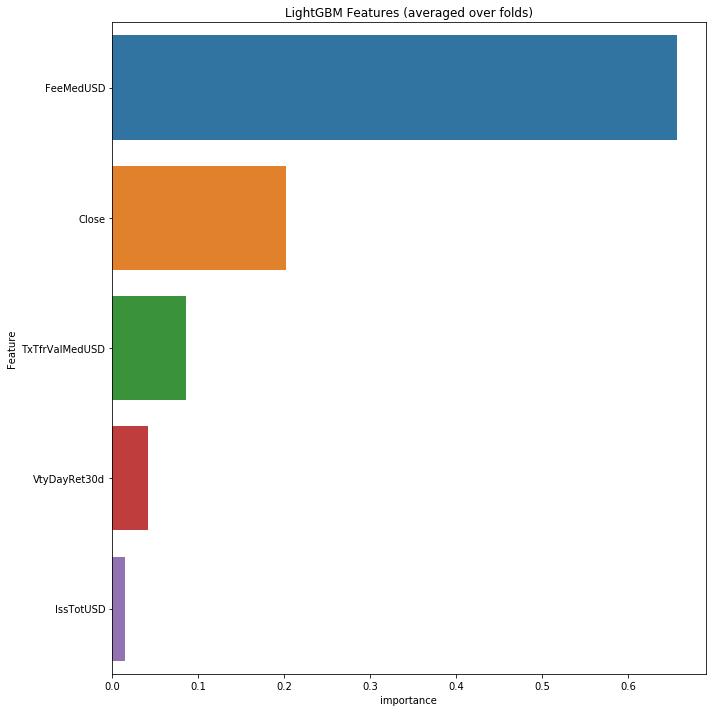

In [28]:
fold_importance_df=pd.DataFrame()
fold_importance_df['Feature']=predict_me.columns
feature_importance_df=pd.DataFrame()
fold_importance_df["importance"]=model.feature_importances_[:len(df.tail(5).columns)]
feature_importance_df=pd.concat([feature_importance_df, fold_importance_df], axis=0)
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:200].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(10,10))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('LightGBM Features (averaged over folds)')
plt.tight_layout()

plt.savefig('lgbm_importances.png')